<h1>Recruitment Data</h1>
<p>Análise de dados de um dataabase na área de RH. Disponível no Kaggle pelo link do <a href="https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data">Databse</a></p>

<h2>Análise dos Dados</h2>

In [ ]:
import sqlite3 as sql
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RECRUITMENT_DATA_PATH = r"C:\data_analytics_recruitment\data\recruitment_data.csv"

In [3]:
df = pd.read_csv(RECRUITMENT_DATA_PATH)

In [4]:
conn = sql.connect(":memory:")

In [5]:
df_sql = df.to_sql("recruitment_data", conn, index=False, if_exists="replace")

In [6]:
cur = conn.cursor()

In [7]:
cur.execute('SELECT * FROM recruitment_data LIMIT 10;')

In [8]:
results = cur.fetchall()

In [9]:
for row in results:
    print(row)

(26, 1, 2, 0, 3, 26.78382755385365, 48, 78, 91, 1, 1)
(39, 1, 4, 12, 3, 25.8626943295439, 35, 68, 80, 2, 1)
(48, 0, 2, 3, 2, 9.920804828174788, 20, 67, 13, 2, 0)
(34, 1, 2, 5, 2, 6.407750728667837, 36, 27, 70, 3, 0)
(30, 0, 1, 6, 1, 43.10534312417558, 23, 52, 85, 2, 0)
(27, 0, 3, 14, 4, 31.706658809375902, 54, 50, 50, 1, 1)
(48, 0, 2, 6, 1, 17.291229200972435, 24, 52, 64, 3, 0)
(40, 0, 4, 13, 3, 10.586810869513323, 6, 3, 92, 3, 0)
(26, 1, 3, 6, 5, 28.77486400848157, 80, 78, 51, 1, 1)
(45, 1, 2, 2, 5, 30.195964463056768, 92, 16, 94, 3, 0)


In [10]:
df.shape

(1500, 11)

In [11]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


<h2>Features do Database</h2>
<ul>
    <li>Age: Idade do candidato (de 20 a 50 anos)</li>
    <li>Gender: Gênero (0 = Masculino, 1 = Feminino)</li>
    <li>EducationLevel: Nível de educação (1 = Bacharelado (tipo 1), 2 = Bacharelado (tipo 2), 3 = Mestrado, 4 = Doutorado)</li>
    <li>ExperienceYears: Anos de experiência profissional</li>
    <li>PreviousCompanies: Quantidades de empresa que já trabalhou</li>
    <li>DistanceFromCompany: Distância da casa do candidato até a empresa (em km)</li>
    <li>InterviewScore: Pontuação obtida na entrevista</li>
    <li>SkillScore: Nota do teste técnico</li>
    <li>PersonalityScore: Avaliação do perfil comportamental</li>
    <li>RecruitmentStrategy: Tipo de estratégia usada pelo RH (1 = Agressiva, 2 = Moderada, 3 = Conservadora)</li>
    <li>HiringDecision: Resultado do processo seletivo (0 = Não contratado, 1 = Contratado)</li>
</ul>

In [12]:
for column in df:
    print(f'{column}: max = {df[column].max()}, min = {df[column].min()}')

Age: max = 50, min = 20
Gender: max = 1, min = 0
EducationLevel: max = 4, min = 1
ExperienceYears: max = 15, min = 0
PreviousCompanies: max = 5, min = 1
DistanceFromCompany: max = 50.99246222432001, min = 1.0313758314228083
InterviewScore: max = 100, min = 0
SkillScore: max = 100, min = 0
PersonalityScore: max = 100, min = 0
RecruitmentStrategy: max = 3, min = 1
HiringDecision: max = 1, min = 0


In [13]:
df.isna().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [14]:
df.isnull()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [16]:
df.dtypes

Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

In [17]:
df['HiringDecision'].value_counts()

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [18]:
df.corr()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
Age,1.000000,0.011286,0.032610,0.024780,-0.032580,-0.021031,-0.025579,-0.008068,0.037727,0.018064,0.001850
Gender,0.011286,1.000000,0.009676,-0.028502,-0.061915,0.003822,-0.020887,0.012333,0.023729,-0.023753,-0.002249
EducationLevel,0.032610,0.009676,1.000000,-0.000951,0.007367,0.020600,0.012807,-0.043367,0.031115,-0.036923,0.236710
ExperienceYears,0.024780,-0.028502,-0.000951,1.000000,0.015784,0.007920,-0.051701,0.006323,0.013891,0.029603,0.122494
PreviousCompanies,-0.032580,-0.061915,0.007367,0.015784,1.000000,0.009187,-0.008387,0.040883,-0.024572,-0.000466,0.044025
DistanceFromCompany,-0.021031,0.003822,0.020600,0.007920,0.009187,1.000000,-0.019594,-0.016891,0.004627,-0.007315,-0.016791
InterviewScore,-0.025579,-0.020887,0.012807,-0.051701,-0.008387,-0.019594,1.000000,-0.004887,-0.027967,0.012004,0.146064
SkillScore,-0.008068,0.012333,-0.043367,0.006323,0.040883,-0.016891,-0.004887,1.000000,-0.004266,-0.031189,0.203668
PersonalityScore,0.037727,0.023729,0.031115,0.013891,-0.024572,0.004627,-0.027967,-0.004266,1.000000,0.004712,0.169177
RecruitmentStrategy,0.018064,-0.023753,-0.036923,0.029603,-0.000466,-0.007315,0.012004,-0.031189,0.004712,1.000000,-0.477552


In [19]:
corr_matrix = df.corr().abs()

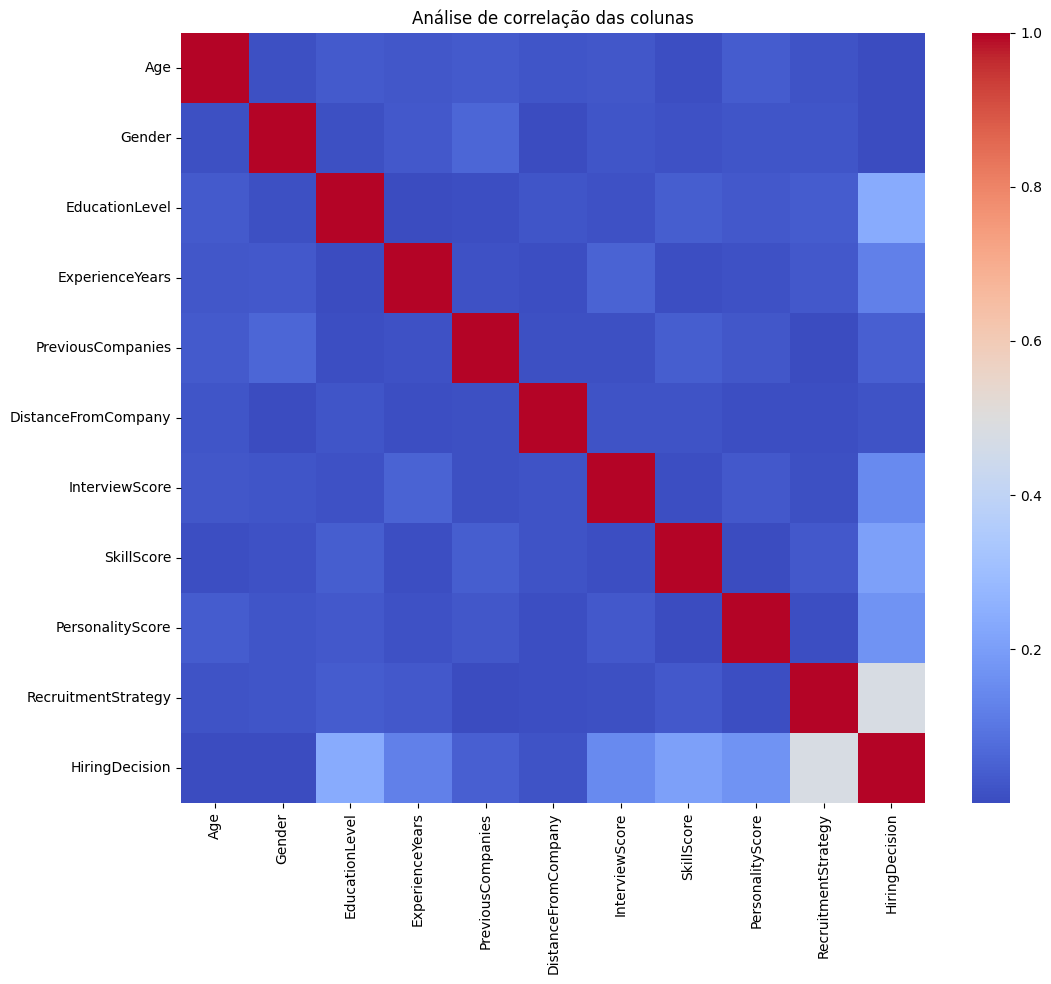

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Análise de correlação das colunas')
plt.show()

In [21]:
query = '''
SELECT Gender, COUNT(*) as total_aprovados
FROM recruitment_data
WHERE HiringDecision = 1
GROUP BY Gender
ORDER BY total_aprovados;
'''

In [22]:
cur.execute(query)

In [23]:
results = cur.fetchall()

In [24]:
for row in results:
    print(row)

(1, 228)
(0, 237)


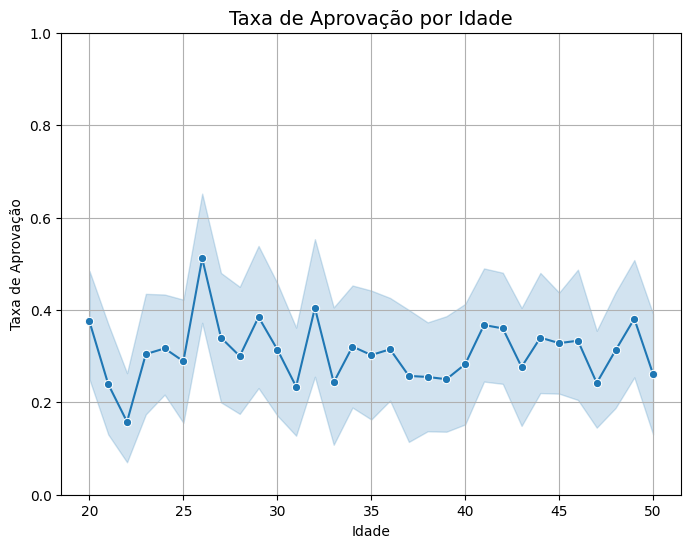

In [25]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='Age', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por Idade", fontsize=14)
plt.xlabel("Idade")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

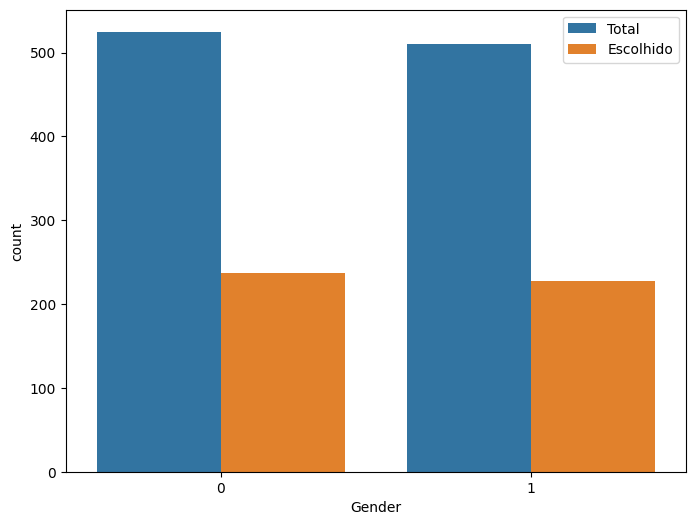

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(df, x=df['Gender'], hue="HiringDecision")
plt.legend(['Total', 'Escolhido'])
plt.show()

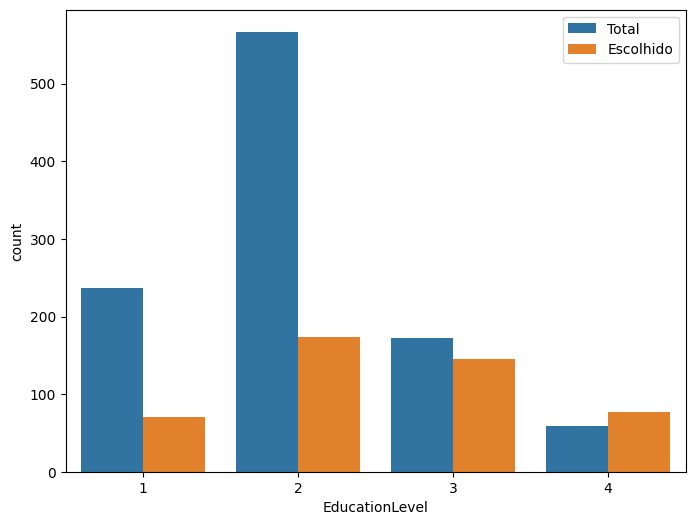

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(df, x=df['EducationLevel'], hue="HiringDecision")
plt.legend(['Total', 'Escolhido'])
plt.show()

In [28]:
df.query('HiringDecision == 1')

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
5,27,0,3,14,4,31.706659,54,50,50,1,1
8,26,1,3,6,5,28.774864,80,78,51,1,1
12,30,0,3,12,5,5.213218,96,46,78,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1489,23,0,2,0,4,21.290605,82,15,41,2,1
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [29]:
df[(df['EducationLevel'] == 2) & (df['HiringDecision'] == 1)].shape

(173, 11)

In [30]:
df[(df['EducationLevel'] == 4) & (df['HiringDecision'] == 1)].shape

(77, 11)

In [31]:
df['EducationLevel'].value_counts()

EducationLevel
2    740
3    317
1    307
4    136
Name: count, dtype: int64

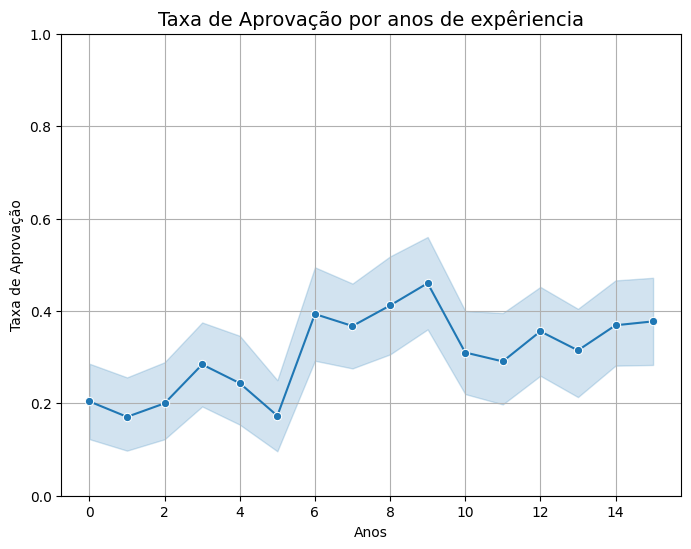

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='ExperienceYears', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por anos de expêriencia", fontsize=14)
plt.xlabel("Anos")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

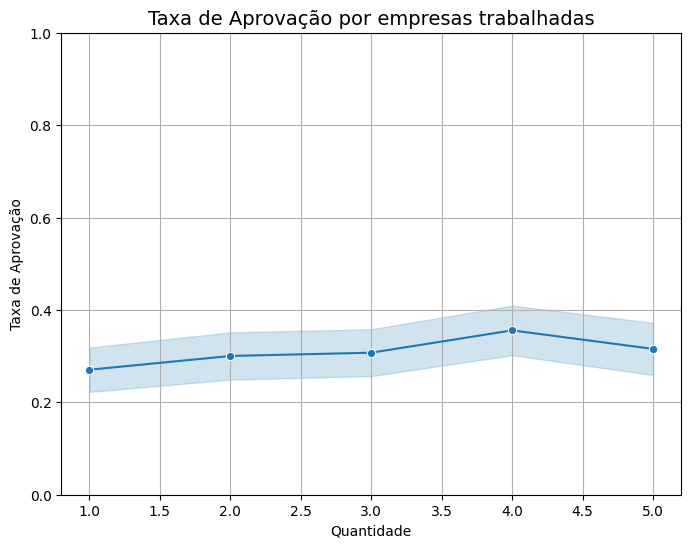

In [33]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='PreviousCompanies', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por empresas trabalhadas", fontsize=14)
plt.xlabel("Quantidade")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [34]:
df['DistanceFromCompany']

0       26.783828
1       25.862694
2        9.920805
3        6.407751
4       43.105343
          ...    
1495     9.183783
1496    14.847731
1497     4.289911
1498    36.299263
1499    12.910472
Name: DistanceFromCompany, Length: 1500, dtype: float64

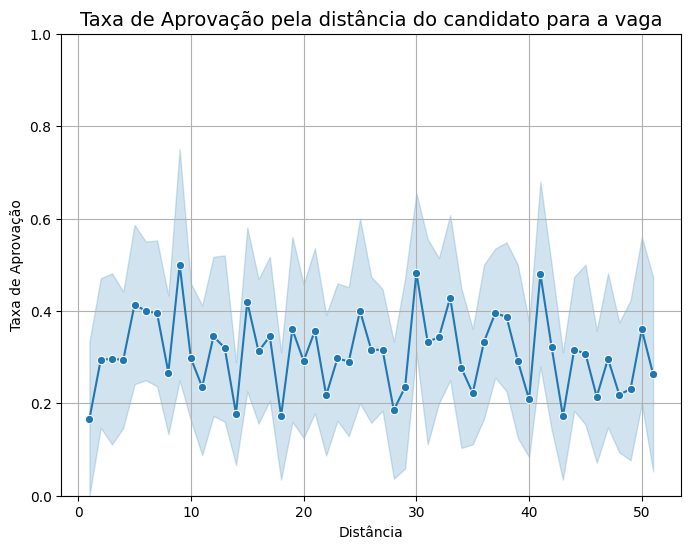

In [35]:
distance = df['DistanceFromCompany'].round().astype(int)
plt.figure(figsize=(8, 6))
sns.lineplot(df, x=distance, y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação pela distância do candidato para a vaga", fontsize=14)
plt.xlabel("Distância")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

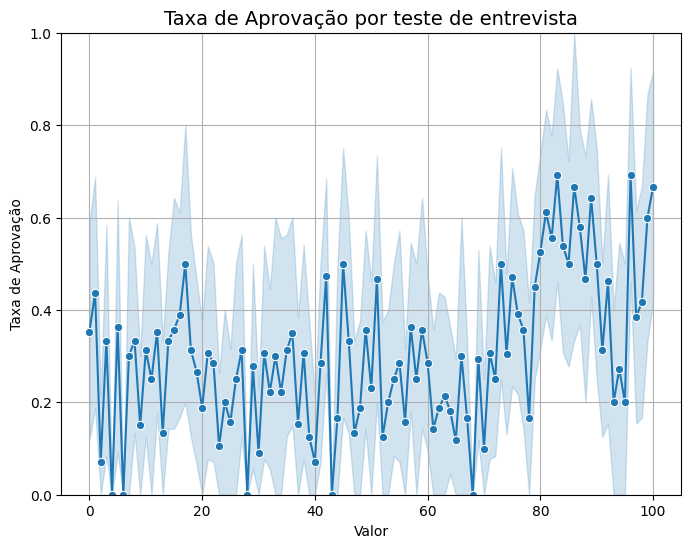

In [36]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='InterviewScore', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por teste de entrevista", fontsize=14)
plt.xlabel("Valor")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

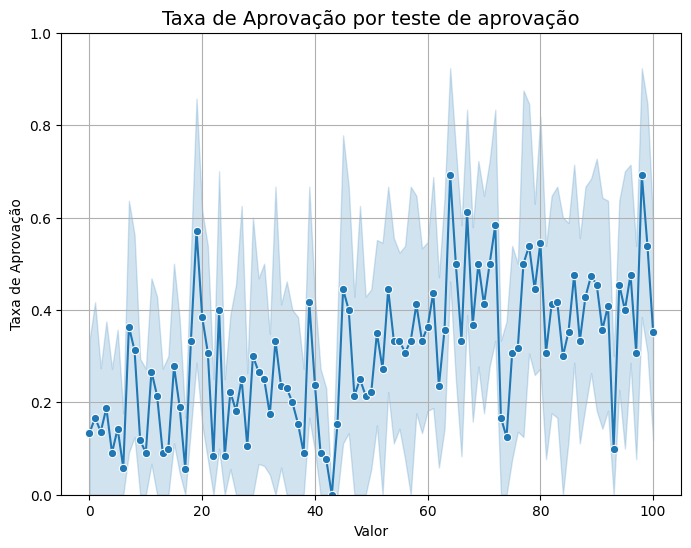

In [37]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='SkillScore', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por teste de aprovação", fontsize=14)
plt.xlabel("Valor")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

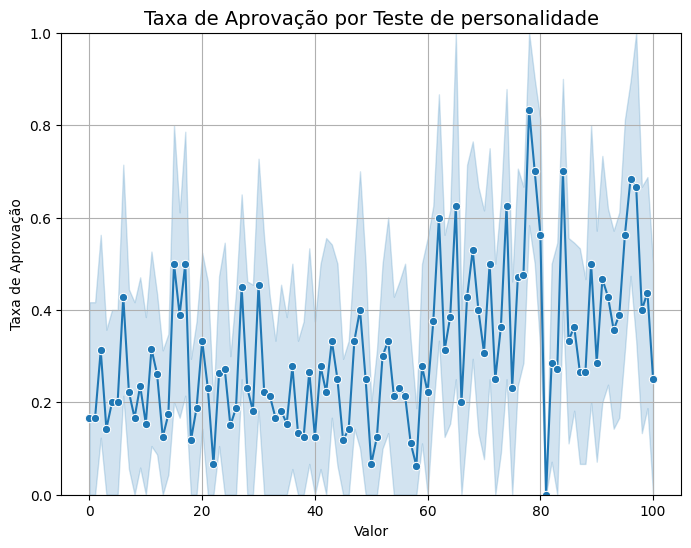

In [38]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='PersonalityScore', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por Teste de personalidade", fontsize=14)
plt.xlabel("Valor")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

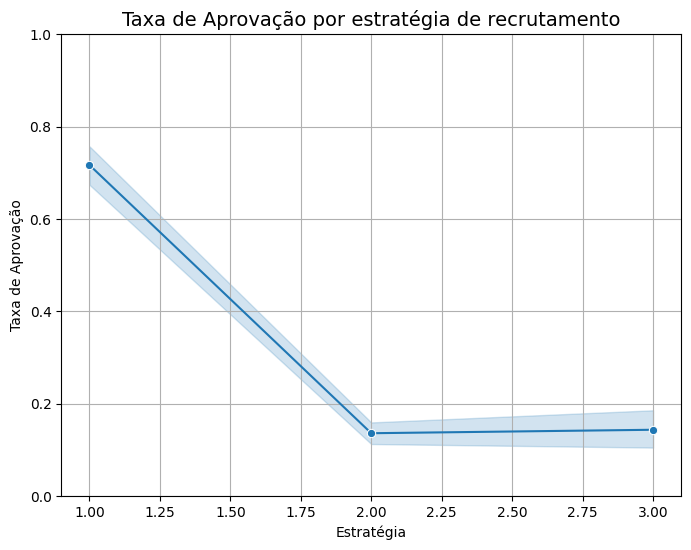

In [39]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='RecruitmentStrategy', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por estratégia de recrutamento", fontsize=14)
plt.xlabel("Estratégia")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [40]:
df.groupby('Gender')['HiringDecision'].value_counts(normalize=True)

Gender  HiringDecision
0       0                 0.688976
        1                 0.311024
1       0                 0.691057
        1                 0.308943
Name: proportion, dtype: float64

In [41]:
df.groupby('HiringDecision')['ExperienceYears'].mean()

HiringDecision
0    7.313043
1    8.541935
Name: ExperienceYears, dtype: float64

In [42]:
df.groupby('HiringDecision')['EducationLevel'].mean()


HiringDecision
0    2.051208
1    2.492473
Name: EducationLevel, dtype: float64

In [43]:
df.groupby('HiringDecision')['SkillScore'].std()

HiringDecision
0    29.288227
1    27.505662
Name: SkillScore, dtype: float64

In [50]:
df[['ExperienceYears', 'HiringDecision']].cov()

,ExperienceYears,HiringDecision
ExperienceYears,21.542726,0.263035
HiringDecision,0.263035,0.214043


<h2>Insights</h2>

<p>Após a análise detlhada dos dados, verificando falhas e problemas nos dados, chegou-se à conclusão 1 através do cálculo de correlação das features e de um gráfico de linha que os métodos de entrevista impactam negativamente com a decisão de escolher o candidato para vaga ou não. Dessa forma observou-se que o método de entrevista agressiva (1) resultou em chances maiores do candidato ser escolhido.</p>
<p>Também foi observado que as colunas Educação (EducationLevel), Habilidades técnicas (SkillScore), Personalidade (PersonalityScore), Resultado da entrevista (InterviewScore) possuem a maior correlação em relação ás outras features, tendo grande chance de terem causa para o candidato ter sido escolhido (conclusão 2). Dessa forma, outras featueres não tem influência direta no processo de escolha do candidato, como o gênero.</p>

<h3>Conclusão 1</h3>

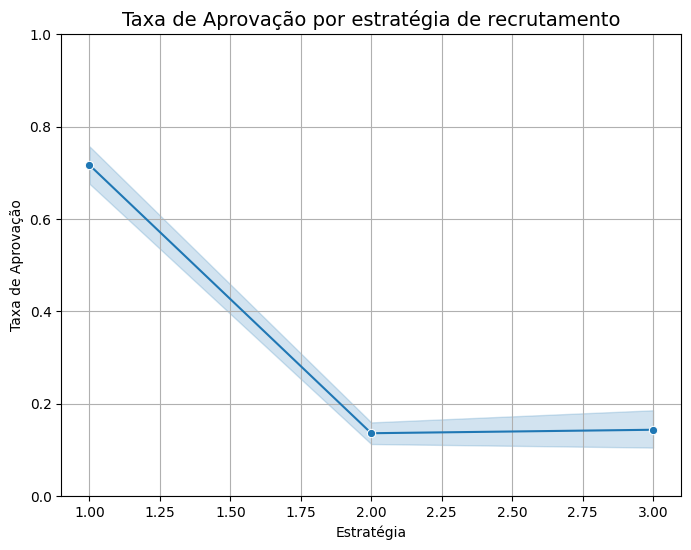

In [51]:
plt.figure(figsize=(8, 6))
sns.lineplot(df, x='RecruitmentStrategy', y="HiringDecision", marker='o')
plt.title("Taxa de Aprovação por estratégia de recrutamento", fontsize=14)
plt.xlabel("Estratégia")
plt.ylabel("Taxa de Aprovação")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

<h3>Conclusão 1 e 2</h3>

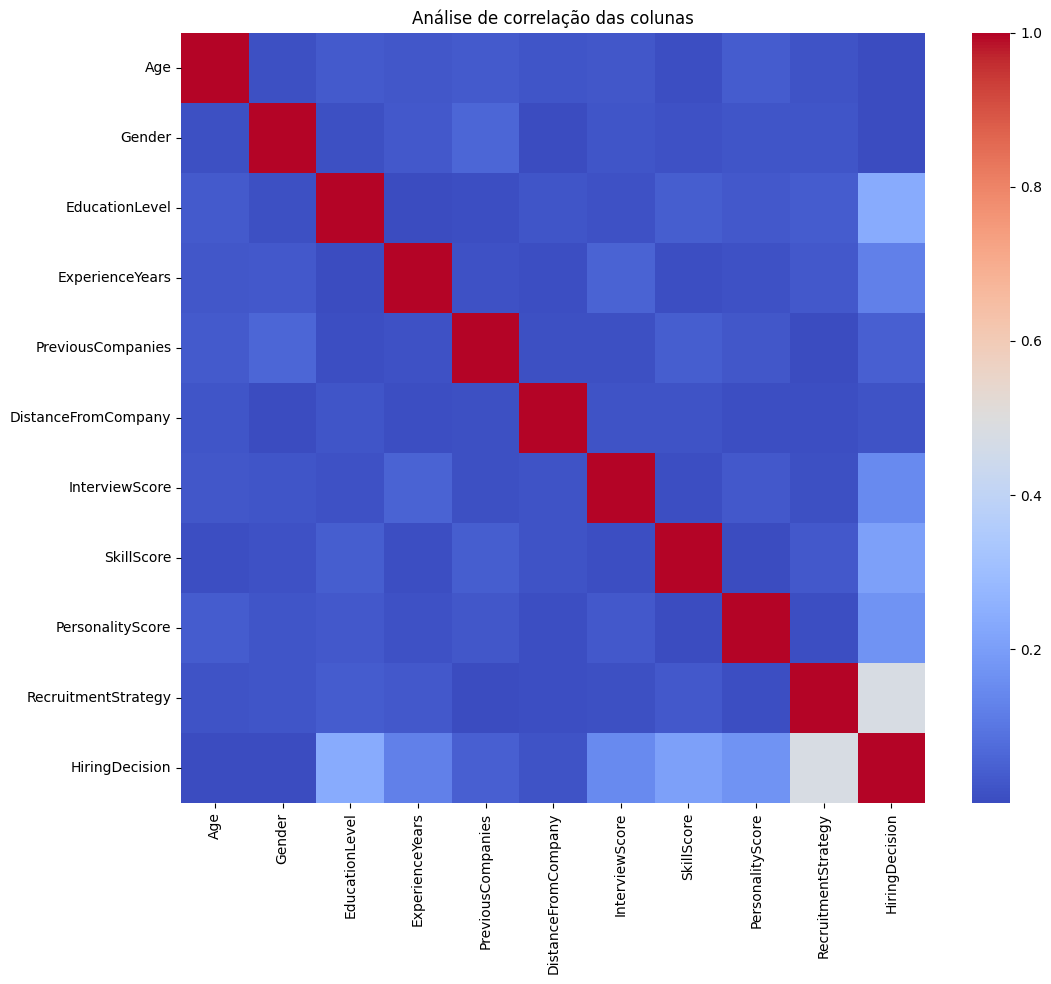

In [52]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Análise de correlação das colunas')
plt.show()